In [1]:


import numpy as np
import matplotlib.pyplot as plt

from src.utils import read_series
from src.describe import *


plt.style.use('ggplot')

total_return_path = "data/01_clean/total_return_var.csv"
total_return = read_series(total_return_path)

tickers = ['PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA', 'BBDC4.SA']

all_tickers = total_return.columns

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

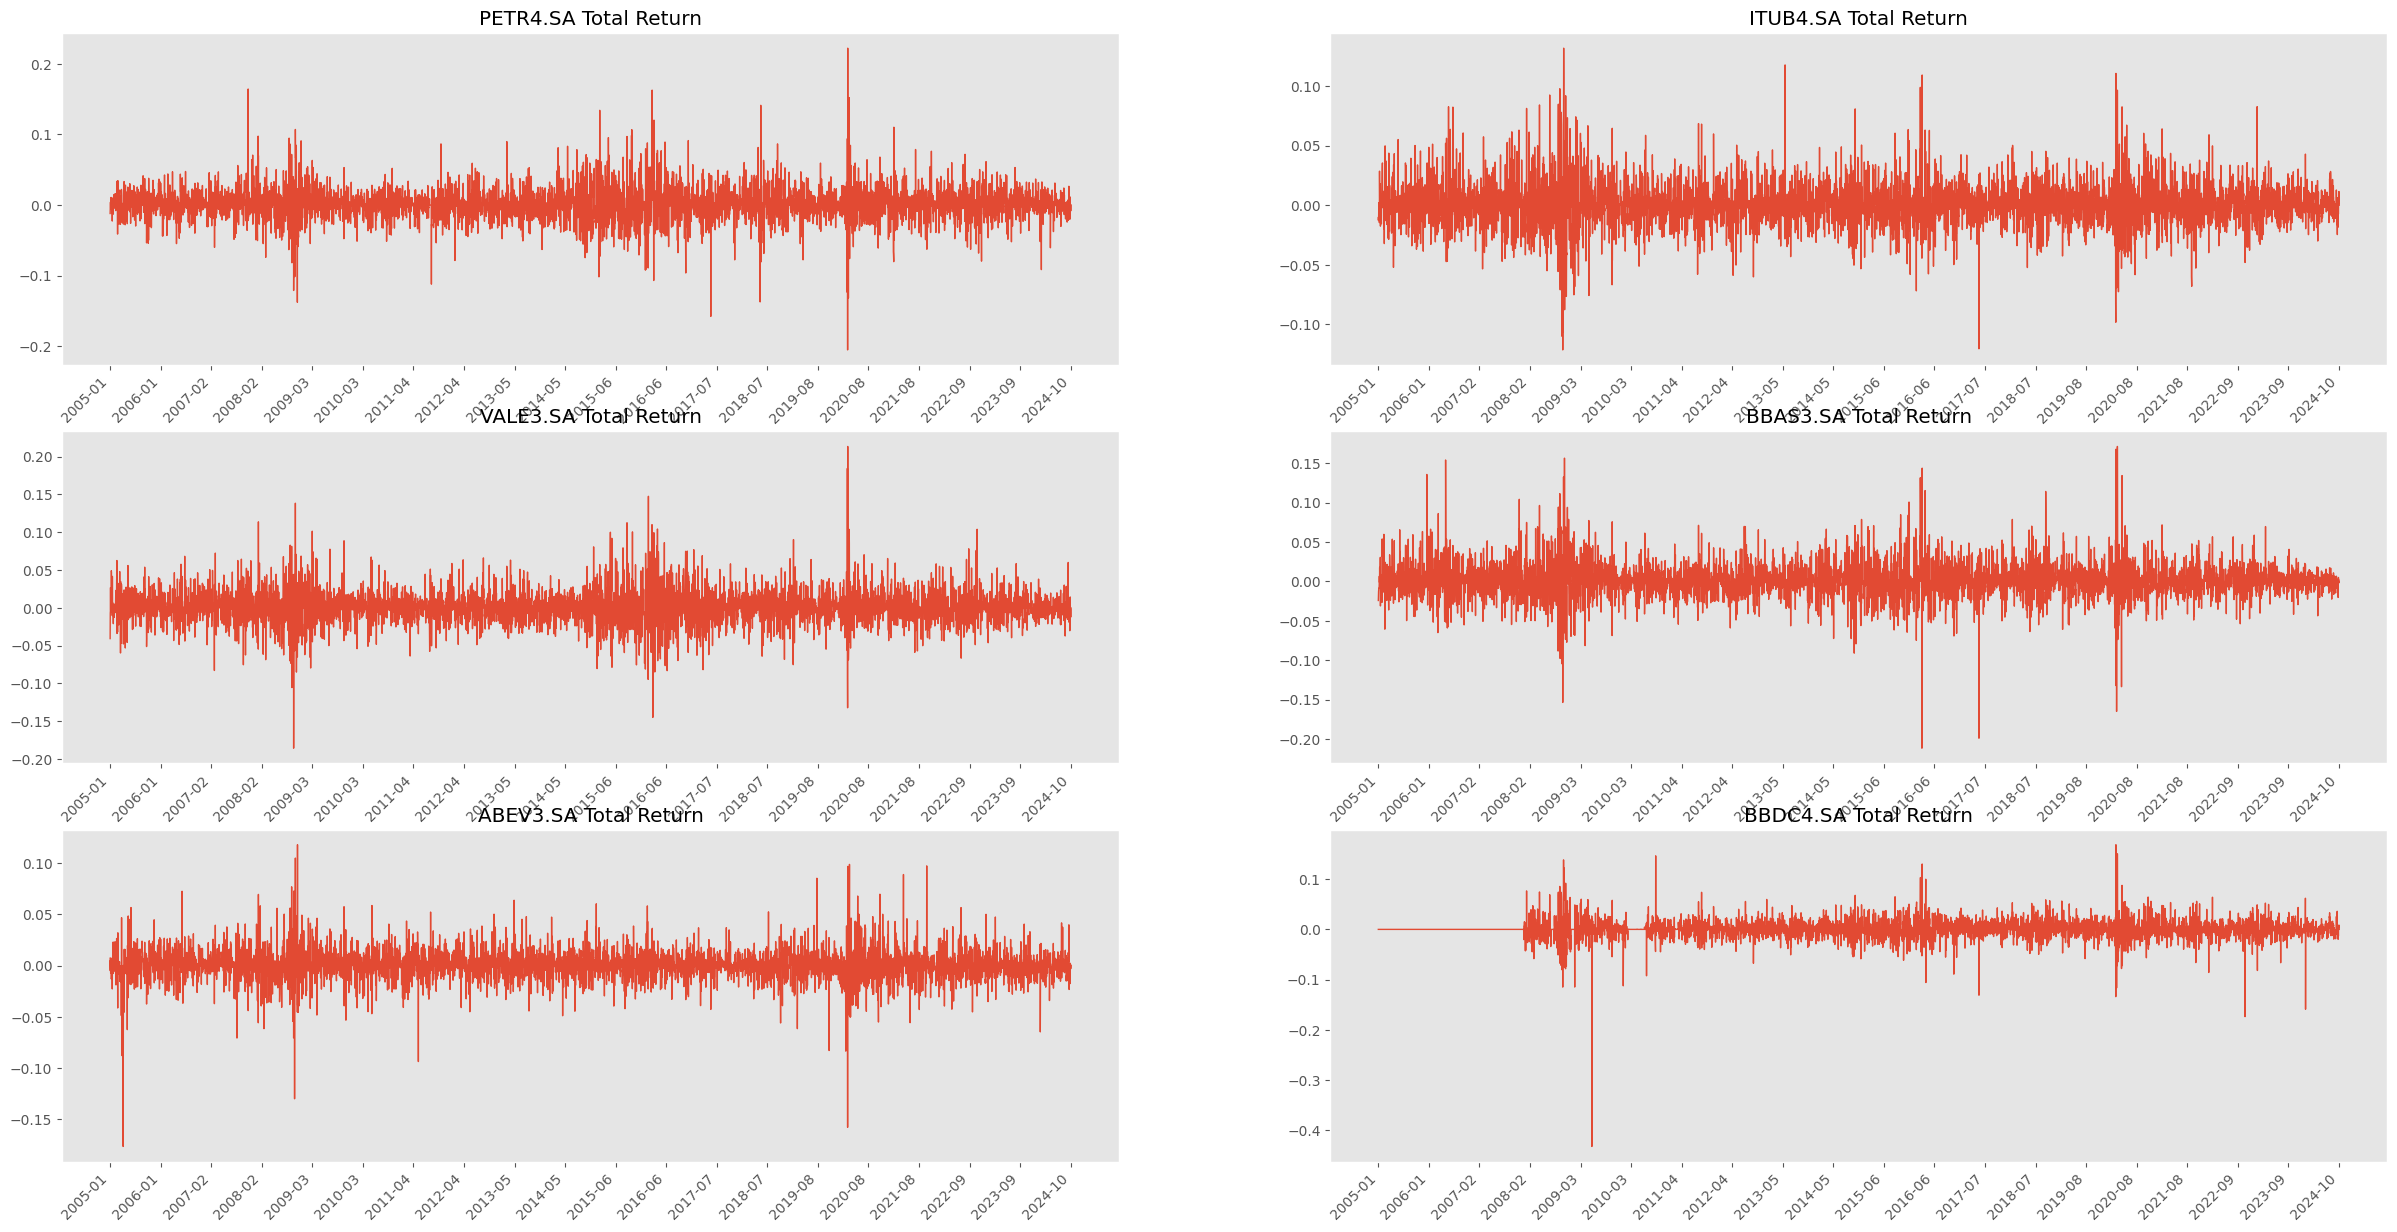

In [2]:
plt.figure(figsize = (30, 25))

n_ticks = 20
x_dates = np.linspace(0, len(total_return.index) - 1, n_ticks, dtype=int)
x_ticks = total_return.index[x_dates]

for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(total_return.index, total_return[stock], linewidth = 1)
    plt.xticks(x_ticks, x_ticks.strftime('%Y-%m'), rotation=45, ha='right')
    plt.title(f'{stock} Total Return')
    plt.grid()
plt.tight_layout

Text(0.5, 1.0, 'Total Return')

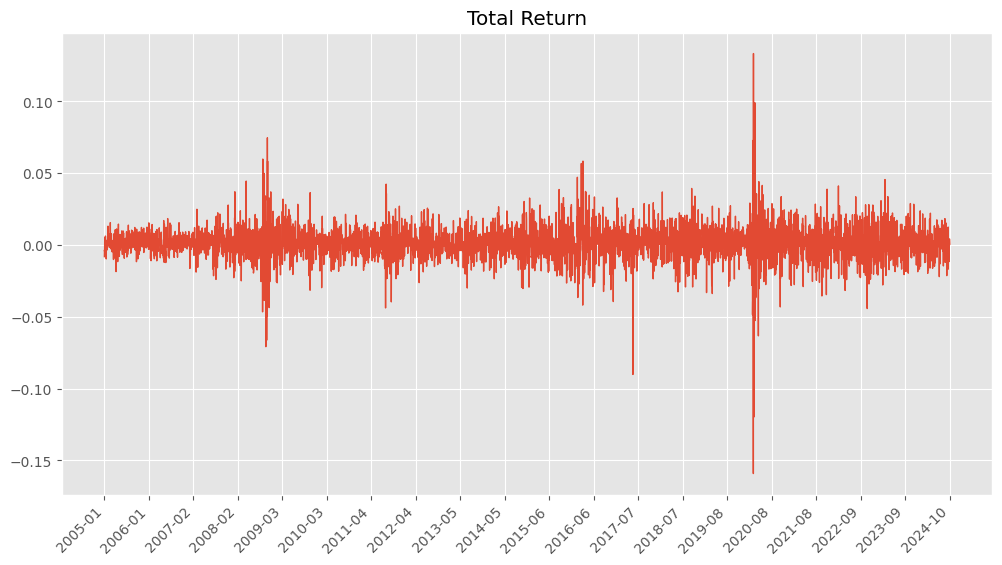

In [3]:

df_average = total_return.mean(axis=1)

plt.figure(figsize = (12, 6))

n_ticks = 20
x_dates = np.linspace(0, len(df_average.index) - 1, n_ticks, dtype=int)
x_ticks = df_average.index[x_dates]

plt.plot(df_average.index, df_average, linewidth = 1)
plt.xticks(x_ticks, x_ticks.strftime('%Y-%m'), rotation=45, ha='right')
plt.title(f'Total Return')


In [4]:

def find_outliers_columns(df, threshold=0.4):
    mask = (total_return > threshold) | (total_return < -threshold)

    filtered_columns = df.columns[mask.any(axis=0)]
    return filtered_columns

outlier_tickers = find_outliers_columns(total_return, threshold=.7)
print(outlier_tickers)

Index(['CYRE3.SA', 'EQTL3.SA', 'PRIO3.SA'], dtype='object')


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

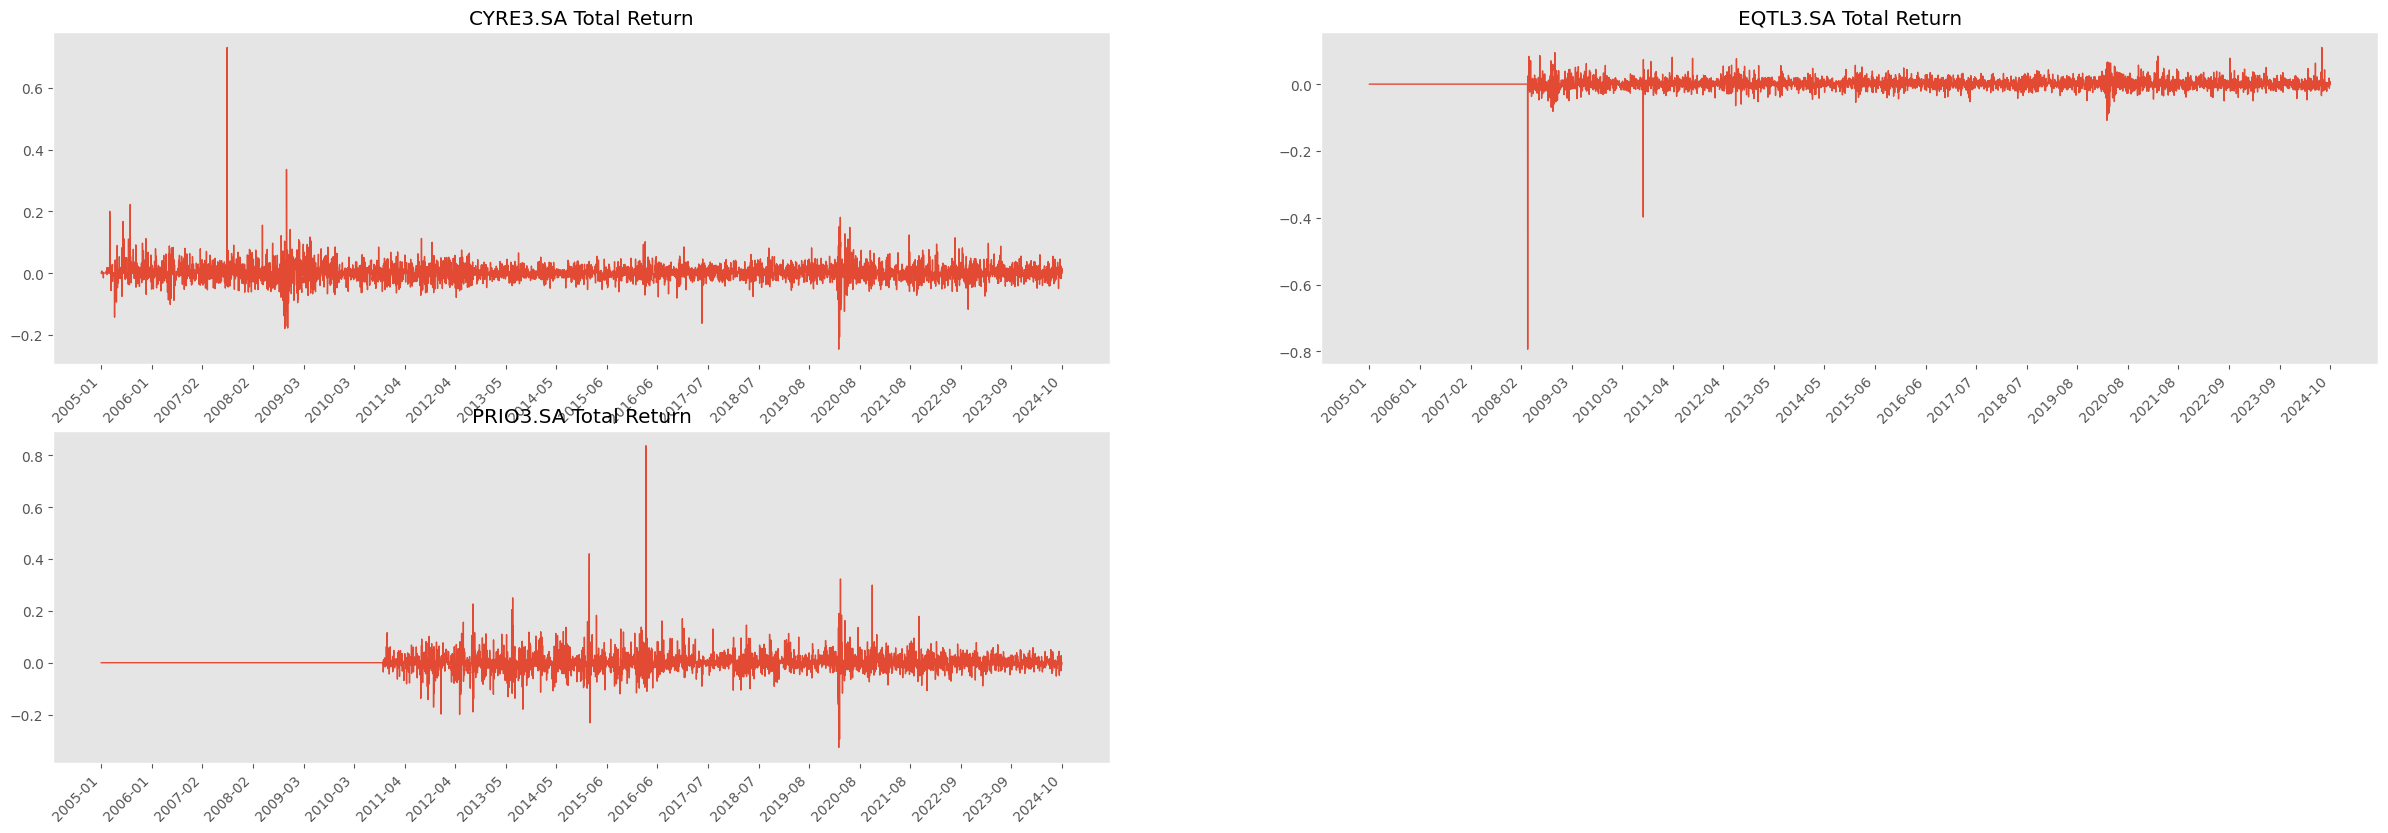

In [5]:
plt.figure(figsize = (30, 25))

n_ticks = 20
x_dates = np.linspace(0, len(total_return.index) - 1, n_ticks, dtype=int)
x_ticks = total_return.index[x_dates]

for i, stock in enumerate(outlier_tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(total_return.index, total_return[stock], linewidth = 1)
    plt.xticks(x_ticks, x_ticks.strftime('%Y-%m'), rotation=45, ha='right')
    plt.title(f'{stock} Total Return')
    plt.grid()
plt.tight_layout

